In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("creditcard.csv")
df.head(10) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
#printing all information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#All the cloumn has non-null values.So we don't need to modify it


In [5]:
#printing all the columns of dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#distribution of legit and fraud transactions.
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# 0---->legit transactions
# 1---->Fraud transactions

In [8]:
#separating the two classes
legit_trans = df[df.Class==0]
fraud_trans = df[df.Class==1]

In [9]:
print(legit_trans.shape)
print(fraud_trans.shape)

(284315, 31)
(492, 31)


In [10]:
legit_trans.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [11]:
fraud_trans.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [12]:
#As we can see that our dataset is highly unbalanced.So, we will use under-sampling.
legit_new = legit_trans.sample(n=492)
new_df = pd.concat([legit_new,fraud_trans],axis=0) #axis=0 because we want to add thses two row wise not column wise.

In [13]:
print(new_df.shape)

(984, 31)


In [14]:
new_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
150457,93389.0,-1.925274,1.381783,0.271943,-0.393729,-0.237776,0.619324,1.799729,-0.403091,2.820612,...,-0.857255,-0.889709,0.019575,0.540868,0.260959,0.048377,0.646104,0.423730,196.96,0
261398,159994.0,-0.625405,0.698043,1.495621,-0.409126,0.833549,-0.974968,1.154120,-0.397527,-0.468241,...,-0.318183,-0.797457,-0.299386,0.052859,0.406573,0.372816,-0.202157,-0.172420,0.89,0
193628,130219.0,1.397040,-1.127020,-1.319603,1.276149,-0.111331,0.388876,0.046203,0.086879,0.605192,...,0.225587,0.014675,-0.133403,0.152982,-0.089531,-0.705534,-0.038416,0.004198,309.97,0
12568,22019.0,-1.892339,-0.633203,2.416690,1.787291,0.710890,-0.679171,-0.359237,0.201413,0.862060,...,0.220289,0.408517,0.333422,0.321913,0.324911,-0.134902,0.247402,0.182734,137.30,0
257425,158156.0,2.053257,-0.045942,-1.223907,0.179659,0.229899,-0.594182,0.135684,-0.210941,0.171912,...,-0.257930,-0.597290,0.257465,-0.466888,-0.233180,0.204820,-0.069056,-0.072888,1.98,0
88277,62069.0,-0.477486,0.903064,1.348936,-0.005718,0.265965,-0.506297,0.786413,-0.141673,-0.035923,...,-0.287200,-0.621108,0.066814,-0.005147,-0.285900,0.066507,-0.030179,-0.142192,12.98,0
213979,139476.0,2.169845,-0.794714,-1.133921,-1.230105,-0.237028,-0.068313,-0.664250,-0.031541,-0.632499,...,-0.235531,-0.818557,0.411159,0.047170,-0.464367,-0.706682,-0.020513,-0.049476,26.32,0
87609,61761.0,-1.590305,1.272792,0.389978,0.514664,-0.238045,-0.821918,0.335137,0.314088,-0.661235,...,0.137857,0.491728,0.290296,0.445328,-0.471558,0.308478,-0.719170,-0.239356,19.54,0
219805,141889.0,2.055762,0.001134,-1.048810,0.400568,-0.040941,-1.110597,0.222569,-0.353853,0.420358,...,-0.274840,-0.610216,0.338244,0.008386,-0.286356,0.198508,-0.062218,-0.058956,0.89,0
3626,3102.0,-0.912541,0.926385,1.894614,0.552219,0.097420,-0.165988,0.981897,-0.319226,-0.242967,...,-0.071637,0.072628,-0.276528,0.555550,-0.022486,-0.599783,-0.382396,-0.116394,50.58,0


In [15]:
print(new_df['Class'].value_counts())

1    492
0    492
Name: Class, dtype: int64


In [16]:
#we will split the data into fetures and target
X = new_df.drop(columns='Class',axis=1)
y = new_df['Class']

In [17]:
#printing X
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
150457   93389.0 -1.925274  1.381783  0.271943 -0.393729 -0.237776  0.619324   
261398  159994.0 -0.625405  0.698043  1.495621 -0.409126  0.833549 -0.974968   
193628  130219.0  1.397040 -1.127020 -1.319603  1.276149 -0.111331  0.388876   
12568    22019.0 -1.892339 -0.633203  2.416690  1.787291  0.710890 -0.679171   
257425  158156.0  2.053257 -0.045942 -1.223907  0.179659  0.229899 -0.594182   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [18]:
#printing y
print(y)

150457    0
261398    0
193628    0
12568     0
257425    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [19]:
#Using the StandardScaler to scale the data
scaler = StandardScaler()
amount = X['Amount'].values
X['Amount'] = scaler.fit_transform(amount.reshape(-1,1))

In [27]:
#We have dropped Time column because it's an external factor.
print(X.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [29]:
#splitting the dataset into training and testing dataset.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [32]:
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [33]:
#predicting our dataset
y_pred = model.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       150
           1       0.91      0.90      0.90       146

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296



In [37]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[137  13]
 [ 15 131]]


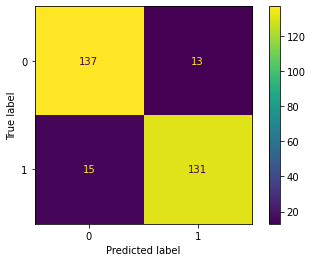

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = model.classes_)
disp.plot()
plt.show()

In [47]:
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy score of our model is {}".format(accuracy))

The accuracy score of our model is 0.9054054054054054
